In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


diab_data = pd.read_csv("diabetic_data.csv", na_values = ["?",'missing', 'Unknown/Invalid', 'NaN'])
print(diab_data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
diab_data.shape
diab_data.head()
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [3]:
numerical_col = [col for col in diab_data.columns if diab_data[col].dtypes != 'O']
discrete_col = ['admission_type_id','discharge_disposition_id','admission_source_id']
numerical_col = [col for col in numerical_col if col not in discrete_col]
print(diab_data[numerical_col].head())

   encounter_id  patient_nbr  time_in_hospital  num_lab_procedures  \
0       2278392      8222157                 1                  41   
1        149190     55629189                 3                  59   
2         64410     86047875                 2                  11   
3        500364     82442376                 2                  44   
4         16680     42519267                 1                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  number_diagnoses  
0                 0                 1  
1                 0                 9  
2       

encounter_id


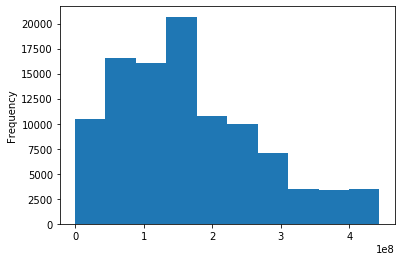

patient_nbr


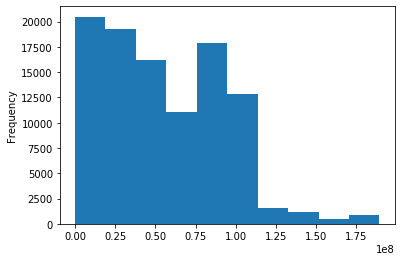

time_in_hospital


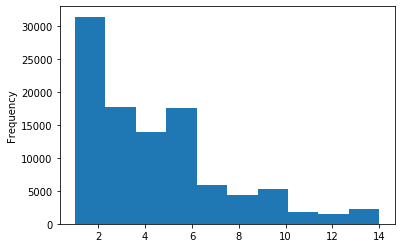

num_lab_procedures


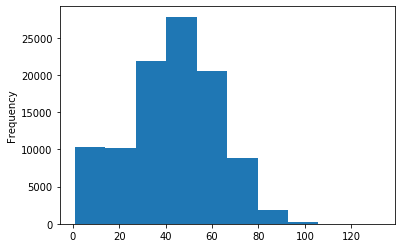

num_procedures


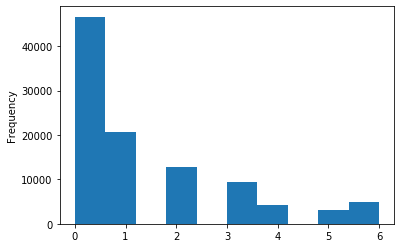

num_medications


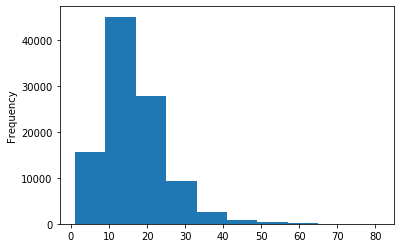

number_outpatient


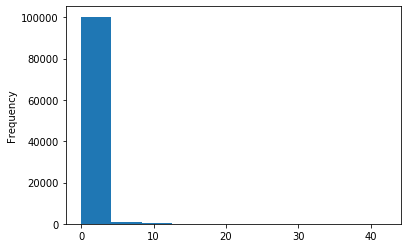

number_emergency


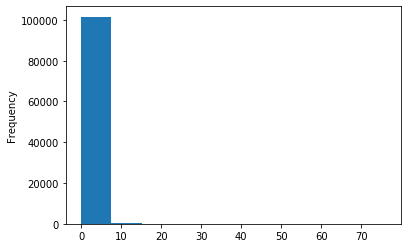

number_inpatient


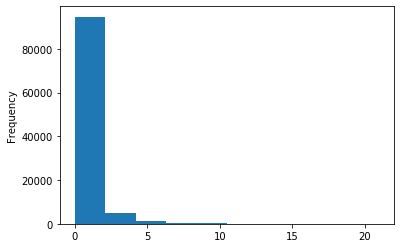

number_diagnoses


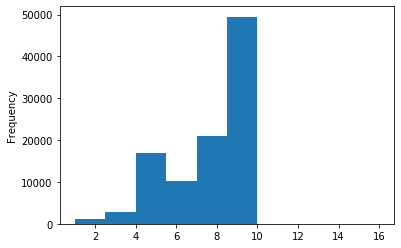

In [8]:
for i in numerical_col:
    print(i)
    diab_data[i].plot('hist')
    plt.show()

In [100]:
col_with_na = [col for col in diab_data.columns if diab_data[col].isnull().sum()>1]

for col in col_with_na:
    print(str(col), np.round(diab_data[col].isnull().mean(), 3)*100, '% of missing values')


race 2.1999999999999997 % of missing values
gender 0.0 % of missing values
weight 96.89999999999999 % of missing values
payer_code 39.6 % of missing values
medical_specialty 49.1 % of missing values
diag_1 0.0 % of missing values
diag_2 0.4 % of missing values
diag_3 1.4000000000000001 % of missing values


In [101]:
col_to_drop = ['encounter_id','patient_nbr','examide', 'citoglipton', 'acetohexamide', 
               'weight', 'payer_code', 'medical_specialty','diag_2','diag_3']
diab_data = diab_data.drop(col_to_drop, axis = 1)
diab_data.shape

(101766, 40)

In [102]:
numerical_col = [col for col in diab_data.columns if diab_data[col].dtypes != 'O']
discrete_col = ['admission_type_id','discharge_disposition_id','admission_source_id']
numerical_col = [col for col in numerical_col if col not in discrete_col]
print(diab_data[numerical_col].head())

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
0                  0                 0                 0                 1  
1                  0                 0                 0                 9  
2                  2                 0                 1                 6  
3                  0                 0                 0                 7  
4                  0                 0                 0                 5  


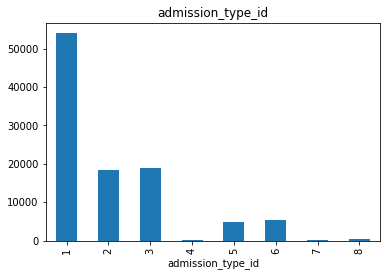

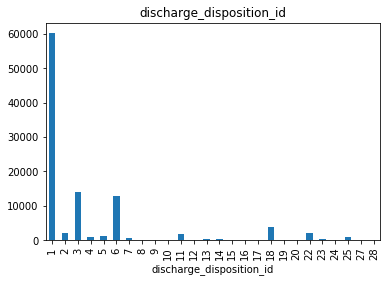

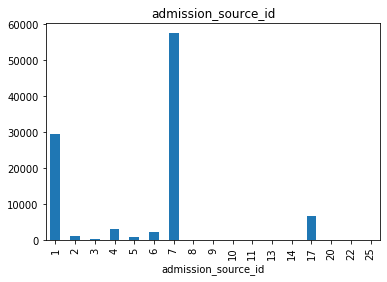

In [22]:
def analyse_discrete_var(df, col):
    df = df.copy()
    df.groupby(col)['readmitted'].count().plot.bar()
    plt.title(col)
    plt.show()

for col in discrete_col:
    analyse_discrete_var(diab_data, col)

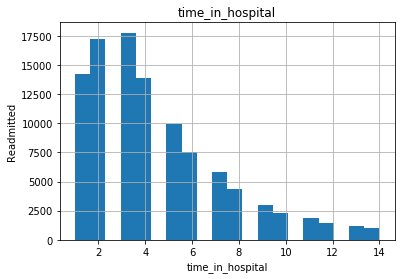

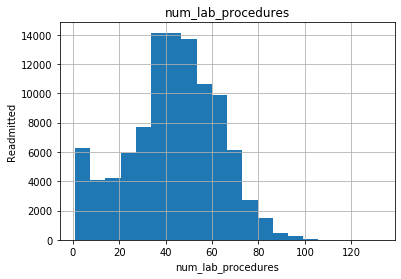

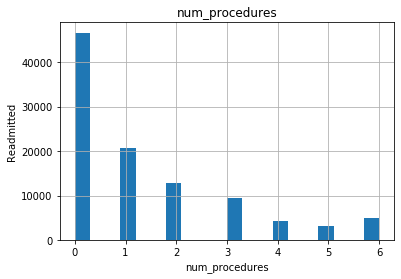

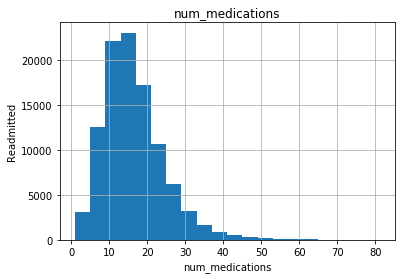

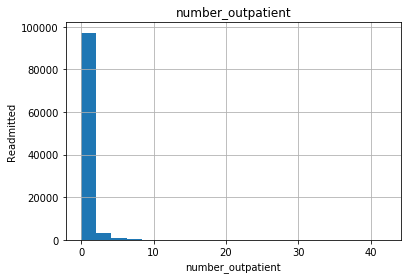

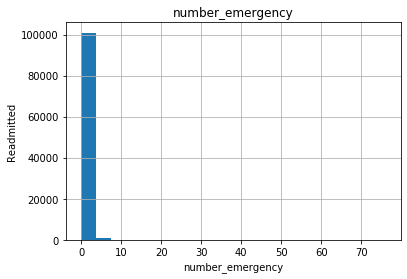

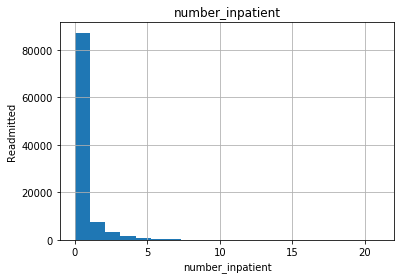

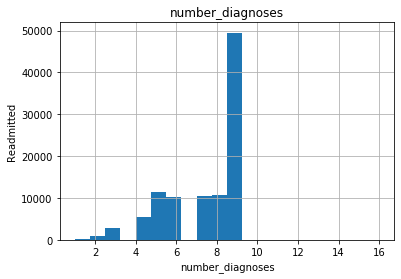

In [25]:
def analyse_cont_var(df, col):
    df = df.copy()
    df[col].hist(bins=20)
    plt.ylabel('Readmitted')
    plt.xlabel(col)
    plt.title(col)
    plt.show()
    
for col in numerical_col:
    analyse_cont_var(diab_data, col)

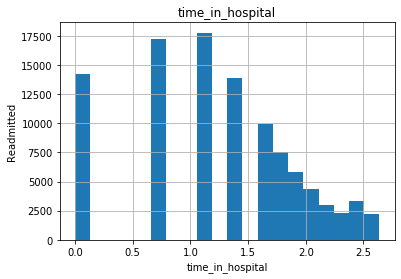

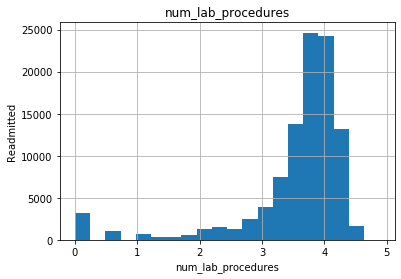

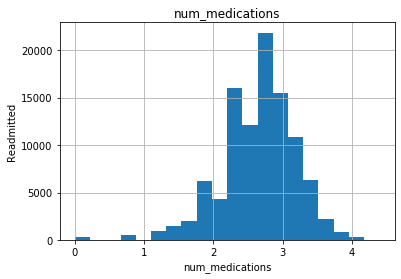

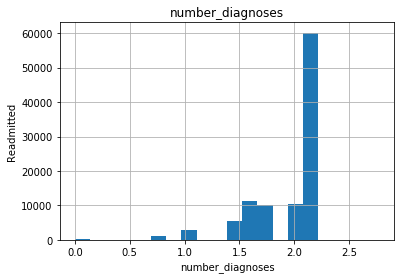

In [27]:
def analyse_transformed_cont(df, col):
    df.copy()
    if 0 in df[col].unique():
        pass
    else:
        df[col] = np.log(df[col])
        df[col].hist(bins=20)
        plt.ylabel('Readmitted')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
    
for col in numerical_col:
    analyse_transformed_cont(diab_data, col)

In [103]:
#categorical variables
categorical_col = [col for col in diab_data.columns if diab_data[col].dtypes == 'O']
diab_data[categorical_col].head()
for col in categorical_col:
    print(col, len(diab_data[col].unique()), 'categories')

race 6 categories
gender 3 categories
age 10 categories
diag_1 717 categories
max_glu_serum 4 categories
A1Cresult 4 categories
metformin 4 categories
repaglinide 4 categories
nateglinide 4 categories
chlorpropamide 4 categories
glimepiride 4 categories
glipizide 4 categories
glyburide 4 categories
tolbutamide 2 categories
pioglitazone 4 categories
rosiglitazone 4 categories
acarbose 4 categories
miglitol 4 categories
troglitazone 2 categories
tolazamide 3 categories
insulin 4 categories
glyburide-metformin 4 categories
glipizide-metformin 2 categories
glimepiride-pioglitazone 2 categories
metformin-rosiglitazone 2 categories
metformin-pioglitazone 2 categories
change 2 categories
diabetesMed 2 categories
readmitted 3 categories


In [104]:
na_val_count_by_col = diab_data.isnull().sum()
na_val_count_by_col[na_val_count_by_col > 0]

race      2273
gender       3
diag_1      21
dtype: int64

In [105]:
diab_data = diab_data.dropna(axis = 0)
diab_data.shape

(99473, 40)

In [20]:
#diab_data.race.value_counts(dropna = False)
#diab_data.describe()
#object_cols = [col for col in diab_data.columns if diab_data[col].dtype == "object"]
#diab_data[object_cols].nunique()

In [106]:
#function to group the ICD 9 codes based on ICD 9 grouping standards
def convert_diagnosis(col):
    diag = []
    for i in col:
        if re.match("^\d*\.?\d+", i) is not None:
            if '.' not in i:
                x = int(i)
                if x > 0 and x < 140:
                    y = '1'
                    diag.append(y)
                elif x >=140 and x < 240:
                    y = '2'
                    diag.append(y)
                elif x >=240 and x < 280:
                    y = '3'
                    diag.append(y)
                elif x >=280 and x < 290:
                    y = '4'
                    diag.append(y)
                elif x >=290 and x < 320:
                    y = '5'
                    diag.append(y)
                elif x >=320 and x < 390:
                    y = '6'
                    diag.append(y)
                elif x >=390 and x < 460:
                    y = '7'
                    diag.append(y)
                elif x >=460 and x < 520:
                    y = '8'
                    diag.append(y)
                elif x >=520 and x < 580:
                    y = '9'
                    diag.append(y)
                elif x >=580 and x < 630:
                    y = '10'
                    diag.append(y)
                elif x >=630 and x < 680:
                    y = '11'
                    diag.append(y)
                elif x >=680 and x < 710:
                    y = '12'
                    diag.append(y)
                elif x >=710 and x < 740:
                    y = '13'
                    diag.append(y)
                elif x >=740 and x < 760:
                    y = '14'
                    diag.append(y)
                elif x >=760 and x < 780:
                    y = '15'
                    diag.append(y)
                elif x >=780 and x < 800:
                    y = '16'
                    diag.append(y)
                else:
                    y = '17'
                    diag.append(y)
            else:
                x = float(i)
                if x > 0 and x < 140:
                    y = '1'
                    diag.append(y)
                elif x >=140 and x < 240:
                    y = '2'
                    diag.append(y)
                elif x >=240 and x < 280:
                    y = '3'
                    diag.append(y)
                elif x >=280 and x < 290:
                    y = '4'
                    diag.append(y)
                elif x >=290 and x < 320:
                    y = '5'
                    diag.append(y)
                elif x >=320 and x < 390:
                    y = '6'
                    diag.append(y)
                elif x >=390 and x < 460:
                    y = '7'
                    diag.append(y)
                elif x >=460 and x < 520:
                    y = '8'
                    diag.append(y)
                elif x >=520 and x < 580:
                    y = '9'
                    diag.append(y)
                elif x >=580 and x < 630:
                    y = '10'
                    diag.append(y)
                elif x >=630 and x < 680:
                    y = '11'
                    diag.append(y)
                elif x >=680 and x < 710:
                    y = '12'
                    diag.append(y)
                elif x >=710 and x < 740:
                    y = '13'
                    diag.append(y)
                elif x >=740 and x < 760:
                    y = '14'
                    diag.append(y)
                elif x >=760 and x < 780:
                    y = '15'
                    diag.append(y)
                elif x >=780 and x < 800:
                    y = '16'
                    diag.append(y)
                else:
                    y = '17'
                    diag.append(y)
        elif 'V' in i:
            y = '18'
            diag.append(y)
        else:
            y = '19'
            diag.append(y)
            
    return diag

diab_data['diag_1'] = convert_diagnosis(diab_data['diag_1'])

In [107]:
diab_data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [108]:
diab_data['readmitted'] = np.where(diab_data['readmitted'] == 'NO', '0', '1')

In [114]:
diab_data_cp = diab_data.copy()
label = LabelEncoder()

for col in categorical_col:
    diab_data_cp[col]=label.fit_transform(diab_data_cp[col]) # convert object type to string

In [115]:
diab_data_cp.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,0
1,2,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
2,0,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,0
3,2,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,0
4,2,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,0


In [116]:
y = diab_data_cp['readmitted']
X = diab_data_cp.drop('readmitted', axis = 1)

In [117]:
X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,0,6,25,1,1,41,0,1,...,0,0,1,1,0,0,0,0,1,0
1,2,0,1,1,1,7,3,59,0,18,...,0,0,3,1,0,0,0,0,0,1
2,0,0,2,1,1,7,2,11,5,13,...,0,0,1,1,0,0,0,0,1,1
3,2,1,3,1,1,7,2,44,1,16,...,0,0,3,1,0,0,0,0,0,1
4,2,1,4,1,1,7,1,51,0,8,...,0,0,2,1,0,0,0,0,0,1


In [118]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs         Score
12     number_inpatient  11728.320252
11     number_emergency   4583.198599
10    number_outpatient   2826.579194
7    num_lab_procedures   1343.448525
9       num_medications    883.319650
14     number_diagnoses    595.568079
6      time_in_hospital    525.292540
8        num_procedures    414.470395
5   admission_source_id    409.193829
13               diag_1    287.427786


In [119]:
top_variables = featureScores.nlargest(10, 'Score').Specs.tolist()
print(top_variables)

['number_inpatient', 'number_emergency', 'number_outpatient', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'time_in_hospital', 'num_procedures', 'admission_source_id', 'diag_1']


In [122]:
X = X[top_variables]

In [121]:
print(diab_data1.head())

   number_inpatient  number_emergency  number_outpatient  num_lab_procedures  \
0                 0                 0                  0                  41   
1                 0                 0                  0                  59   
2                 1                 0                  2                  11   
3                 0                 0                  0                  44   
4                 0                 0                  0                  51   

   num_medications  number_diagnoses  time_in_hospital  num_procedures  \
0                1                 1                 1               0   
1               18                 9                 3               0   
2               13                 6                 2               5   
3               16                 7                 2               1   
4                8                 5                 1               0   

   admission_source_id diag_1  
0                    1      3  
1         

In [124]:
X.head()

,number_inpatient,number_emergency,number_outpatient,num_lab_procedures,num_medications,number_diagnoses,time_in_hospital,num_procedures,admission_source_id,diag_1
0,0,0,0,41,1,1,1,0,1,11
1,0,0,0,59,18,9,3,0,7,11
2,1,0,2,11,13,6,2,5,7,2
3,0,0,0,44,16,7,2,1,7,0
4,0,0,0,51,8,5,1,0,7,10


In [123]:
Rf = RandomForestClassifier()
Dt = DecisionTreeClassifier()
NB = GaussianNB()
Lg = LogisticRegression()

mod = [Rf, Dt, NB, Lg]

def classification_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    for i in model:
        clf = i.fit(X_train, y_train)
        pred = i.predict(X_test)
        print(i)
        print(accuracy_score(y_test, pred))
        Classes =['NO', 'YES']
        print(classification_report(y_test, pred, target_names=Classes))
        
        
classification_model(mod, X, y)
        

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.5866563903223645
              precision    recall  f1-score   support

          NO       0.60      0.70      0.65     16034
         YES       0.57      0.45      0.50     13808

    accuracy                           0.59     29842
   macro avg       0.58      0.58      0.57     29842
weighted avg       0.58      0.59      0.58     29842

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       mi

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.6176194625025132
              precision    recall  f1-score   support

          NO       0.61      0.81      0.70     16034
         YES       0.64      0.39      0.49     13808

    accuracy                           0.62     29842
   macro avg       0.63      0.60      0.59     29842
weighted avg       0.62      0.62      0.60     29842

